In [43]:
import numpy as np
def normalise_windows(window_data): # 数据全部除以最开始的数据再减一
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'r').read() # 读取文件中的数据
    data = f.split('\n') # split() 方法用于把一个字符串分割成字符串数组，这里就是换行分割
    sequence_lenghth = seq_len + 1 # #得到长度为seq_len+1的向量，最后一个作为label
    result = []
    for index in range(len(data)-sequence_lenghth):
        result.append(data[index : index+sequence_lenghth]) # 制作数据集，从data里面分割数据
    if normalise_window:
        result = normalise_windows(result)
    result = np.array(result) # shape (4121,51) 4121代表行，51是seq_len+1
    row = round(0.9*result.shape[0]) # round() 方法返回浮点数x的四舍五入值
    train = result[:int(row), :] # 取前90%
    np.random.shuffle(train) # shuffle() 方法将序列的所有元素随机排序。
    x_train = train[:, :-1] # 取前50列，作为训练数据
    y_train = train[:, -1]  # 取最后一列作为标签
    x_test = result[int(row):, :-1] # 取后10% 的前50列作为测试集
    y_test = result[int(row):, -1] # 取后10% 的最后一列作为标签
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 最后一个维度1代表一个数据的维度
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return [x_train, y_train, x_test, y_test]

# x_train, y_train, x_test, y_test = load_data('./video_pixels_liqiaoyun.csv', 50, True)
x_train, y_train, x_test, y_test = load_data('./video_pixels_li_test.csv', 50, True)
# x_train, y_train, x_test, y_test = load_data('./sp500.csv', 50, True)
print('shape_x_train',np.array(x_train).shape) #shape_x_train (3709, 50, 1)
print('shape_y_train',np.array(y_train).shape) #shape_y_train (3709,)
print('shape_x_test',np.array(x_test).shape) #shape_x_test (412, 50, 1)
print('shape_y_test',np.array(y_test).shape) #shape_y_test (412,)


shape_x_train (4653, 50, 1)
shape_y_train (4653,)
shape_x_test (517, 50, 1)
shape_y_test (517,)


In [38]:
# x_train_2, y_train_2, x_test_2, y_test_2 = load_data('./video_pixels.csv', 50, True)
x_train_2, y_train_2, x_test_2, y_test_2 = load_data('./video_pixels_li_test.csv', 50, True)

In [44]:
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
model = Sequential()
# model.add(LSTM(input_dim = 1, output_dim=50, return_sequences=True))
model.add(LSTM(50, input_dim = 1, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.04901528358459473


In [45]:
model.fit(x_train, y_train, batch_size= 512,epochs = 5,  validation_split=0.05)


Epoch 1/5
9/9 [==============================] - 17s 944ms/step - loss: 0.0088 - val_loss: 0.0019
Epoch 2/5
9/9 [==============================] - 7s 818ms/step - loss: 0.0074 - val_loss: 0.0020
Epoch 3/5
9/9 [==============================] - 7s 787ms/step - loss: 0.0071 - val_loss: 0.0023
Epoch 4/5
9/9 [==============================] - 7s 754ms/step - loss: 0.0068 - val_loss: 0.0022
Epoch 5/5
9/9 [==============================] - 7s 785ms/step - loss: 0.0065 - val_loss: 0.0026


In [46]:
# 预测
def load_data_2(filename, seq_len, normalise_window):
    f = open(filename, 'r').read() # 读取文件中的数据
    data = f.split('\n') # split() 方法用于把一个字符串分割成字符串数组，这里就是换行分割
    sequence_lenghth = seq_len + 1 # #得到长度为seq_len+1的向量，最后一个作为label
    result = []
    for index in range(len(data)-sequence_lenghth):
        result.append(data[index : index+sequence_lenghth]) # 制作数据集，从data里面分割数据
    if normalise_window:
        result = normalise_windows(result)
    result = np.array(result) # shape (4121,51) 4121代表行，51是seq_len+1
    row = round(0.9*result.shape[0]) # round() 方法返回浮点数x的四舍五入值
    train = result[:int(row), :] # 取前90%
    # np.random.shuffle(train) # shuffle() 方法将序列的所有元素随机排序。
    x_train = train[:, :-1] # 取前50列，作为训练数据
    y_train = train[:, -1]  # 取最后一列作为标签

    x_test = result[int(row):, :-1] # 取后10% 的前50列作为测试集
    y_test = result[int(row):, -1] # 取后10% 的最后一列作为标签
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 最后一个维度1代表一个数据的维度
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return [x_train, y_train, x_test, y_test]

x_train_3, y_train_3, x_test_3, y_test_3 = load_data('./video_pixels_wang.csv', 50, True)

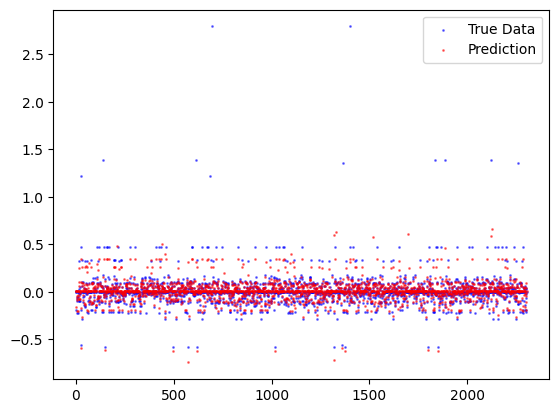

In [54]:
import warnings
warnings.filterwarnings("ignore")
def predict_point_by_point(model, data):
    predicted = model.predict(data) # 输入测试集的全部数据进行全部预测，（412，1）
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted
# predictions = predict_point_by_point(model, x_test)

predictions = predict_point_by_point(model, x_train_3)

import matplotlib.pylab as plt
# def plot_results(predicted_data, true_data):
#     fig = plt.figure(facecolor='white')
#     ax = fig.add_subplot(111)
#     ax.plot(true_data, label='True Data')
#     plt.plot(predicted_data, label='Prediction')
#     plt.legend()
#     plt.show()
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.scatter(range(len(true_data)), true_data, label='True Data', color='blue', alpha=0.5, s=1)
    ax.scatter(range(len(predicted_data)), predicted_data, label='Prediction', color='red', alpha=0.5, s=1)
    plt.legend()
    plt.show()

plot_results(predictions, y_train_3)

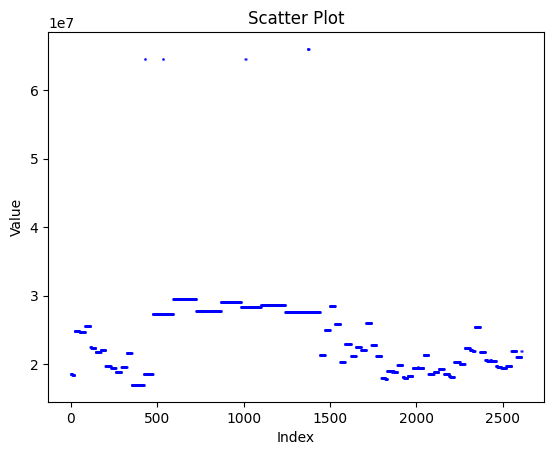

In [52]:
import csv
import matplotlib.pyplot as plt

# 从CSV文件中读取数据
data = []
with open('./video_pixels_wang.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(float(row[0]))

# 绘制散点图
plt.scatter(range(len(data)), data, color='blue', alpha=0.5, s=1)
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


len(data) 307


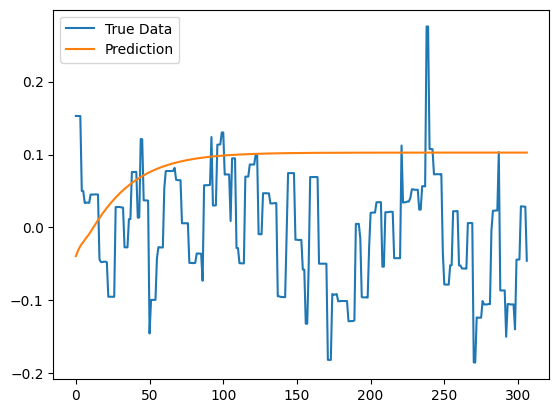

In [32]:
def predict_sequence_full(model, data, window_size):
    curr_frame = data[0] # (1, 50)
    predicted = []
    print('len(data)',len(data))
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[np.newaxis, :, :])[0, 0]) # 输入50个数据，预测出一个数据
        curr_frame = curr_frame[1:] # 取后面49个数据
        curr_frame = np.insert(curr_frame, [window_size - 1], predicted[-1], axis=0) # 将预测出的数据加在第50个数据点处
    return predicted


predictions = predict_sequence_full(model, x_test_2, 50)

import matplotlib.pylab as plt
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()


plot_results(predictions, y_test_2)

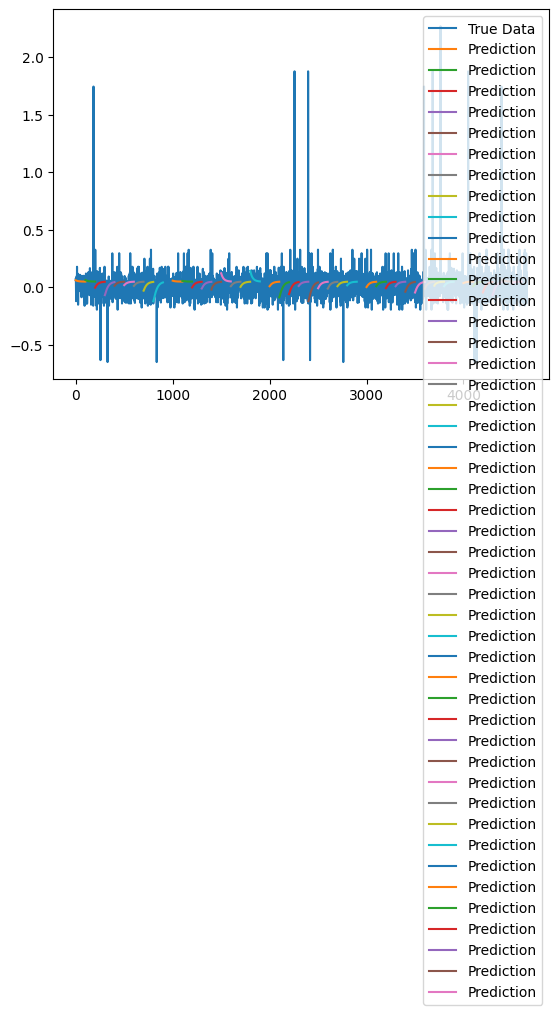

In [57]:
def predict_sequences_multiple(model, data, window_size, prediction_len):
    prediction_seqs = []
    for i in range(int(len(data) / prediction_len)): # 定滑动窗口的起始点
        curr_frame = data[i * prediction_len]
        predicted = []
        for j in range(prediction_len): # 与滑动窗口一样分析
            predicted.append(model.predict(curr_frame[np.newaxis, :, :])[0, 0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size - 1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs


# predictions = predict_sequences_multiple(model, x_test_2, 50, 100)
predictions = predict_sequences_multiple(model, x_train_2, 50, 100)

import matplotlib.pylab as plt
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()


plot_results_multiple(predictions, y_train_2, 100)